In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_excel("Cauvery.xlsx")
df2 = pd.read_excel("Godavari.xlsx")
df3 = pd.read_excel("Krishna.xlsx")
df4 = pd.read_excel("Mahanadi.xlsx")

merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
merged_df
#print(merged_df.head())

,Date,Discharge,flood runoff,daily runoff,weekly runoff,Flood
0,1998-01-01,548.0,0.0,0.63,NaN,0.0
1,1998-01-02,548.0,0.0,0.63,NaN,0.0
2,1998-01-03,548.0,0.0,0.63,NaN,0.0
3,1998-01-04,468.0,0.0,0.54,NaN,0.0
4,1998-01-05,652.0,0.0,0.75,NaN,0.0
...,...,...,...,...,...,...
30675,2018-12-27,3678.0,0.0,2.60,20.34,0.0
30676,2018-12-28,3799.0,0.0,2.69,21.33,0.0
30677,2018-12-29,3541.0,0.0,2.51,21.22,0.0
30678,2018-12-30,3945.0,0.0,2.79,20.36,0.0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30680 entries, 0 to 30679
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           30680 non-null  datetime64[ns]
 1   Discharge      29867 non-null  float64       
 2   flood runoff   30680 non-null  float64       
 3   daily runoff   30680 non-null  float64       
 4   weekly runoff  30656 non-null  float64       
 5   Flood          30680 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.4 MB


In [ ]:
merged_df.isnull()

,Date,Discharge,flood runoff,daily runoff,weekly runoff,Flood
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
30675,False,False,False,False,False,False
30676,False,False,False,False,False,False
30677,False,False,False,False,False,False
30678,False,False,False,False,False,False


In [ ]:
merged_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
30675,False
30676,False
30677,False
30678,False


In [ ]:
merged_df.describe()

,Date,Discharge,flood runoff,daily runoff,weekly runoff,Flood
count,30680,29867.000000,30680.000000,30680.000000,30656.000000,30680.000000
mean,2008-07-01 12:00:00,2357.269662,0.151304,1.104033,7.727906,0.033960
min,1998-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003-04-02 00:00:00,660.500000,0.000000,0.390000,2.920000,0.000000
50%,2008-07-01 12:00:00,1495.000000,0.000000,0.770000,5.470000,0.000000
75%,2013-10-01 00:00:00,2944.500000,0.000000,1.410000,9.810000,0.000000
max,2018-12-31 00:00:00,30154.000000,93.400000,14.150000,93.870000,10.000000
std,NaN,2684.505307,2.332168,1.166204,7.787739,0.418138


In [ ]:
merged_df.corr()

,Date,Discharge,flood runoff,daily runoff,weekly runoff,Flood
Date,1.000000,0.038642,0.011123,0.002007,0.001400,-0.012188
Discharge,0.038642,1.000000,0.284397,0.788554,0.710076,0.317008
flood runoff,0.011123,0.284397,1.000000,0.372185,0.382204,0.844982
daily runoff,0.002007,0.788554,0.372185,1.000000,0.924238,0.355560
weekly runoff,0.001400,0.710076,0.382204,0.924238,1.000000,0.358578
Flood,-0.012188,0.317008,0.844982,0.355560,0.358578,1.000000


<Axes: >

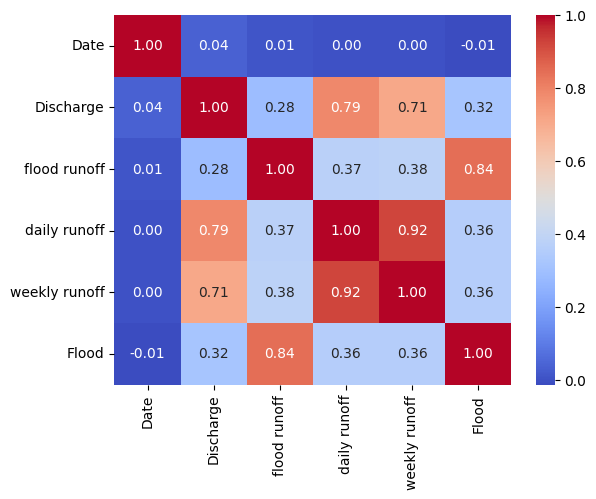

In [ ]:
import seaborn as sns
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

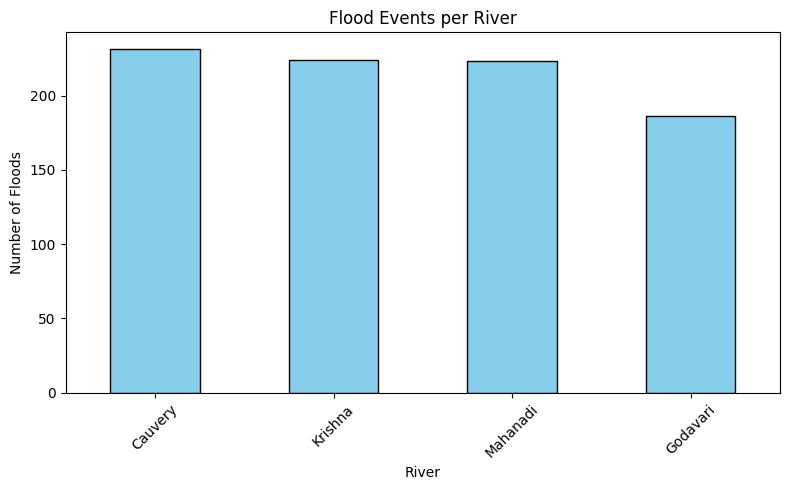

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# ---- Step 1: Load and merge all files ----
files = glob.glob("*.xlsx") + glob.glob("*.csv")
all_data = []

for f in files:
    try:
        df = pd.read_excel(f) if f.endswith('.xlsx') else pd.read_csv(f)
        river_name = f.split('.')[0]
         # Get name from file
        df['River'] = river_name
        all_data.append(df)
    except Exception as e:
        print(f"Error reading {f}: {e}")

data = pd.concat(all_data, ignore_index=True)

# ---- Step 2: Create/Check 'Flood' column ----
# If dataset already has flood column, it will use it.
# Otherwise, it creates one using water_level threshold.
if 'Flood' in data.columns:
    data['Flood'] = data['Flood'].astype(int)
else:
    col = [c for c in data.columns if 'water' in c.lower() or 'level' in c.lower()]
    if col:
        c = col[0]
        threshold = data[c].quantile(0.9)
        data['Flood'] = (data[c] > threshold).astype(int)
    else:
        raise ValueError("No 'Flood' or 'water level' column found!")

# ---- Step 3: Count flood events per river ----
flood_counts = data.groupby('River')['Flood'].sum().sort_values(ascending=False)

# ---- Step 4: Plot ----
plt.figure(figsize=(8,5))
flood_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Flood Events per River')
plt.xlabel('River')
plt.ylabel('Number of Floods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
